# Wetterstation Kloten

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.interpolate import interp1d

1. Import der Daten
   - Beschreibt die Datenstruktur.
   - Zeigt auf, wie viele Messungen es sind.

In [8]:
#load csv file
weather = np.loadtxt('Zürich21-22-GruppeG.csv', skiprows=1, delimiter=';', dtype=str)

#select data for Kloten
klo_weather = [row for row in weather if row[0] == 'KLO'] #klo_weather is a list of lists or Numpy array???


- #stn: Stationnummer oder ID der Wetterstation
- time: Zeitpunkt der Messung im Format JJJJMMDDhhmm
- prestah0: Luftdruck auf Stationshöhe (in hPa)
- tre200h0: Lufttemperatur in 2m Höhe (in Grad Celsius)
- rre150h0: Niederschlagssumme (in mm) der letzten 6 Minuten
- su2000h0: Sonnenscheindauer in Minuten der letzten Stunde
- time_diff: Zeitdifferenz zur vorigen Messung in Minuten

In [12]:
print("Anzahl Messungen:", len(klo_weather))


klo_weather_t = np.transpose(klo_weather)

#stn;time;prestah0;tre200h0;rre150h0;su2000h0;time_diff
#stn = klo_weather_t[0]
#time = klo_weather_t[1].astype.datetime
time = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in klo_weather_t[1]]
prestah0 = klo_weather_t[2].astype(float)
tre200h0 = klo_weather_t[3].astype(float)
rre150h0 = klo_weather_t[4].astype(float)
su2000h0 = klo_weather_t[5].astype(float)
time_diff = klo_weather_t[6].astype(float)

Anzahl Messungen: 7473


2. Da einige Datenpunkte fehlen, müsst ihr diese interpolieren.
   - Wählt dazu eine geeignete Methode und begründet eure Wahl.
   - Führt die Methode durch, um eine interpolierte Version der Daten mit mindestens doppelt so vielen Punkten zu erzeugen.

In [10]:
time_diff_demo = time_diff[:25]
print(time_diff_demo)


[ 0.  1.  2.  3.  4.  5.  8.  9. 10. 13. 15. 17. 20. 22. 23. 25. 26. 27.
 29. 30. 31. 32. 33. 35. 36.]


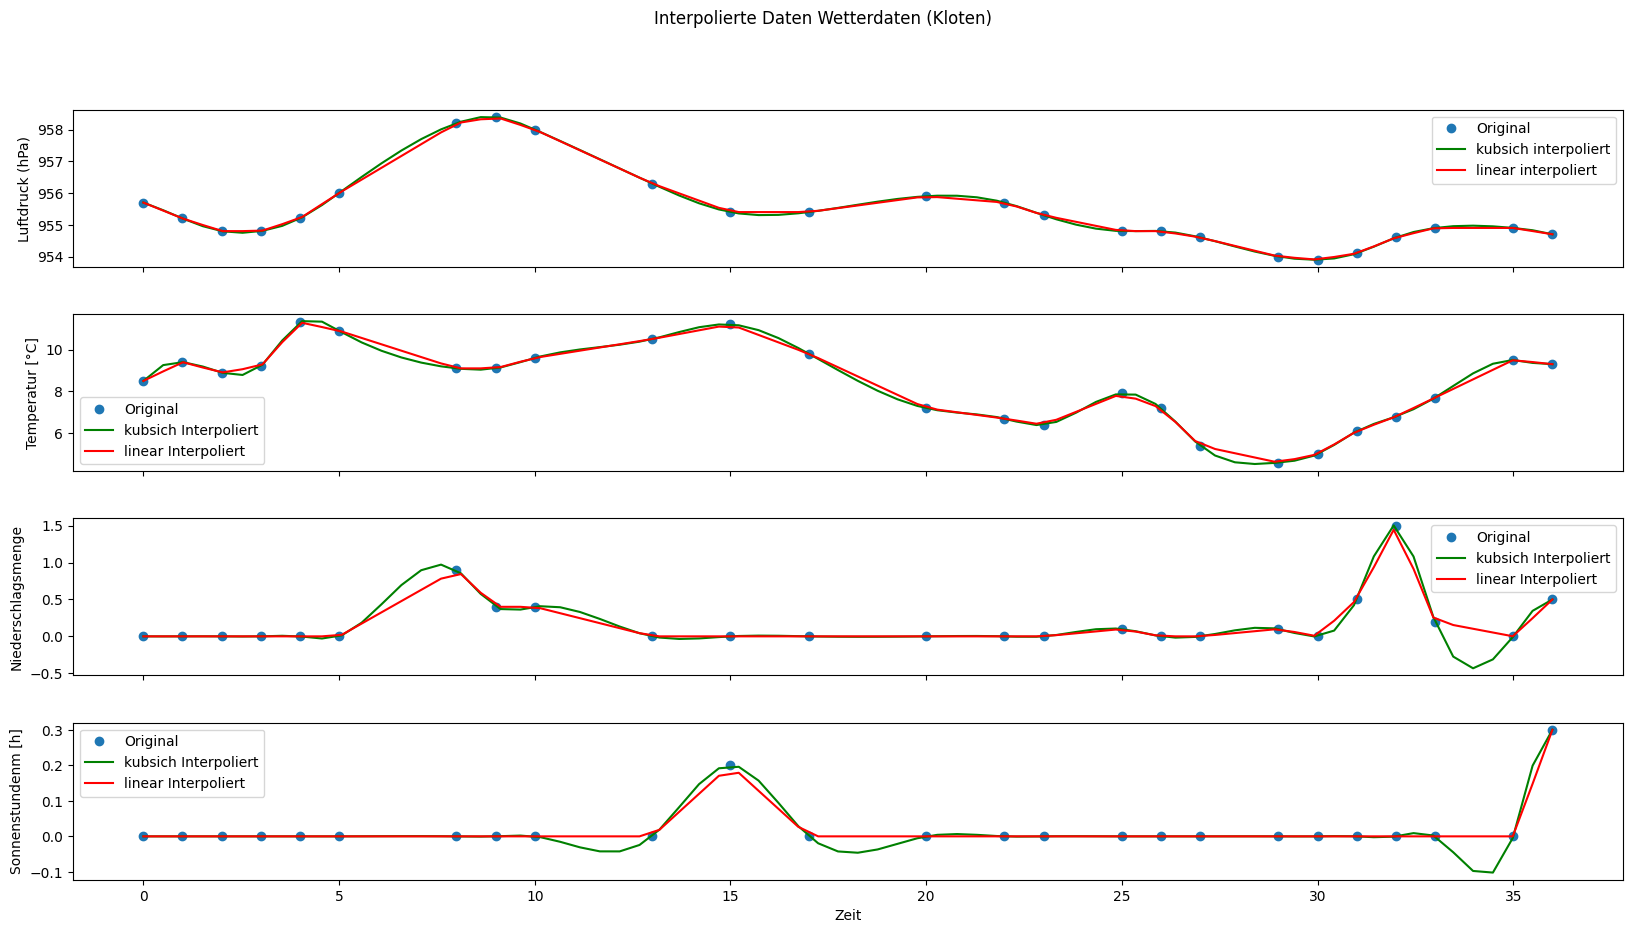

In [13]:
max = int(np.max(time_diff[:25]))
#print(max)
#0, 7473, 2*7473

t = np.linspace(0, max, (2*max))

#f_cubic = interpolate.interp1d(time_diff[:25], prestah0[:2], kind='cubic')

f_cubic = interp1d(time_diff, klo_weather_t[2:6], kind='cubic')
f_linear = interp1d(time_diff, klo_weather_t[2:6], kind = 'linear')

prestah0_inter, tre200h0_inter,rre150h0_inter, su2000h0_inter = f_cubic(t)
prestah0_inter_linear, tre200h0_inter_linear,rre150h0_inter_linear, su2000h0_inter_linear = f_linear(t)

klo_weather_t_inter = np.array([prestah0_inter, tre200h0_inter,rre150h0_inter, su2000h0_inter])


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

ax1.plot(time_diff_demo, prestah0[:25], 'o', label='Original')
ax1.plot(t, prestah0_inter, 'g-', label='kubsich interpoliert')
ax1.plot(t, prestah0_inter_linear, 'r-', label='linear interpoliert')
ax1.set_ylabel('Luftdruck (hPa)')
#ax1.set_xlabel('Zeit')
ax1.legend()

ax2.plot(time_diff_demo, tre200h0[:25], 'o', label='Original')
ax2.plot(t, tre200h0_inter, 'g-', label='kubsich Interpoliert')
ax2.plot(t, tre200h0_inter_linear, 'r-', label='linear Interpoliert')
ax2.set_ylabel('Temperatur [°C]')
#ax2.set_xlabel('Zeit')
ax2.legend()

ax3.plot(time_diff_demo, rre150h0[:25], 'o', label='Original')
ax3.plot(t, rre150h0_inter, 'g-', label='kubsich Interpoliert')
ax3.plot(t, rre150h0_inter_linear, 'r-', label='linear Interpoliert')
ax3.set_ylabel('Niederschlagsmenge') #Einheit: mm ?
#ax3.set_xlabel('Zeit')
ax3.legend()

ax4.plot(time_diff_demo, su2000h0[:25], 'o', label='Original')
ax4.plot(t, su2000h0_inter, 'g-', label='kubsich Interpoliert')
ax4.plot(t, su2000h0_inter_linear, 'r-', label='linear Interpoliert')
ax4.set_ylabel('Sonnenstundenm [h]')
#ax4.set_xlabel('Zeit')
ax4.legend()

plt.xlabel('Zeit')
plt.suptitle('Interpolierte Daten Wetterdaten (Kloten)')
plt.show()

3. Ihr sollt alle Variablen (Luftdruck, Temperatur, Regenmenge und Sonnenstunden) über einen selbstgewählten Zeitraum darstellen. 
   - Basisvariante: Wähle einen interessanten Zeitraum von 1-2 Wochen.
   - Schwierigere Variante (mehr Punkte): Errechne tageweise Durchschnitte, um die Variablen in einem grösseren Zeitraum (mehrere Monate/Quartal) darzustellen.

In [ ]:
print(time[0:5])

tage = time.astype('datetime64[D]')
uhrzeiten = time.astype('datetime64[h]') - tage.astype('datetime64[h]')

""" print(uhrzeiten[:24])
print(tage[12:20]) """


#initialize 
luftdruck = np.array([]).astype(float)
mean_luftdruck = np.array([]).astype(float)
day_before = tage[0]

""" for tag in tage[:20]:
    if day_before == tag:
        luftdruck = np.append(luftdruck, trew200h0)
    else:
        mean_luftdruck = np.append(np.mean(luftdruck)) 
        #clear lufdruck
        luftdruck = np.array([]) """
        
print(tage[10:20])
print(trew200h0[10:20])
for i in range(len(tage[10:20])):
    if day_before == tage[i]:
        luftdruck = np.append(luftdruck, trew200h0[i+10].astype(float))  #+10 because of the first 10 rows
    else:
        mean_luftdruck = np.append(mean_luftdruck, np.mean(luftdruck)) 
        #clear lufdruck
        luftdruck = np.array([])
        day_before = tage[i+10]

mean_luftdruck = np.append(mean_luftdruck, np.mean(luftdruck)) 
        
print(mean_luftdruck)
        